# Técnicas Matemáticas para Big Data

## Project 02 Hidden Markov Models
https://github.com/s126784/tmbd/

The dataset is available at https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

### GROUP G3:
 - ??? - #60488 - Not Found
 - Nicolas Liebau - #123781 - 50% Work Participation
 - Oleksandr Solovei - #126784 - 50% Work Participation

## 1. Introduction to the problem of study [1,0 valor]

Human Activity Recognition (HAR) using smartphone sensor data has become increasingly important in modern applications, from healthcare monitoring to fitness tracking and smart home automation. The ability to automatically detect and classify human activities through smartphone sensors (accelerometer and gyroscope) presents both opportunities and challenges in data analysis and pattern recognition. 

This study explores the application of Hidden Markov Models (HMM) to the HAR dataset, which contains sensor data collected from 30 subjects performing six basic activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying. HMMs are particularly well-suited for this analysis due to their ability to model sequential data and capture underlying state transitions, making them ideal for understanding the temporal nature of human activities. The study aims to demonstrate how HMMs can effectively model and predict human activities based on smartphone sensor data.

## 2. Brief and general description of the approach and methods used [1.5 valor]

This project classifies human activities based on data from smartphone sensors. We use Hidden Markov Models (HMMs) to model time-series data. HMMs are effective because they can model dependencies and transitions between hidden states.

### **Approach and Methods Used**

1. **Data Preprocessing:**  
   - The dataset is cleaned and standardized to ensure that the sensor readings (accelerometer and gyroscope data) are scaled and ready for modeling
   - Features related to sensor readings are selected, and data is split into training and testing sets

2. **Model Selection:**  
   - A GaussianHMM is chosen as the primary model due to its ability to handle continuous, multidimensional observations 
   - The model is trained on the training set to learn the transition probabilities, emission probabilities, and initial state probabilities

3. **Mapping Hidden States to Activities:**  
   - The HMM outputs hidden states corresponding to each observation 
   - These states are mapped to specific human activities (e.g., walking, sitting) based on patterns observed in the training data

4. **Model Evaluation:**  
   - The trained HMM is evaluated on the test set, with predictions compared to the ground truth labels
   - Performance metrics such as accuracy, confusion matrix, and classification report are generated to assess the model's effectiveness

This approach ensures that both the temporal and probabilistic nature of the data is effectively captured, making HMMs an ideal choice for this task.

## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

The field of Human Activity Recognition (HAR) has grown quickly. This is because wearable technology and smartphones with sensors have become more common. HAR categorises physical activities based on data from sensors. HAR is used in many areas, including healthcare, sports and smart environments.

The early development of HAR systems used traditional machine learning methods, such as SVM and decision trees, which required a lot of data and knowledge ([Anguita et al., 2013](https://ieeexplore.ieee.org/document/6606013)). These approaches worked well for simple tasks but did not capture the sequential nature of human motion.  

HMMs are used to model temporal dependencies in sequential data. HMMs were first used in speech recognition ([Rabiner, 1989](https://ieeexplore.ieee.org/document/18626)), but soon they were used for HAR tasks. For example, [Mannini and Sabatini (2010)](https://ieeexplore.ieee.org/document/5432200) showed that HMMs can be used to classify physical activities from wearable sensor data. HMMs can capture transitions between activities, such as moving from walking to standing, which static classifiers often miss.

Deep learning methods like LSTM networks are now the best way to do HAR ([Hammerla et al., 2016](https://www.nature.com/articles/srep34731)). These methods don't need manual feature extraction and can learn complex patterns from raw data. They are more expensive to run and harder to understand than HMMs.

HMMs are still useful because they are simple, easy to understand and quick, especially for smaller data sets or when computers are slow. This project uses the GaussianHMM variant for the HAR study. This has been shown to work well for continuous, multidimensional data ([Anguita et al., 2013](https://ieeexplore.ieee.org/document/6606013)).

## 4. About the main method/algorithm used [1,5 valor]

### **Hidden Markov Models (HMMs)**

HMMs are statistical models used to describe systems that change between hidden states. These models are good for time-series data, where you want to guess hidden states from what you see. In this project, the hidden states are activities (e.g. walking, sitting), while the observations are sensor readings from the accelerometer and gyroscope.

---

#### **Key Components of HMMs**

1. **Hidden States:**  
   Show the main activities (e.g. walking, standing). This project has six states, for the six activities.

2. **Observations:**  
   Smartphone sensor data is recorded and modelled as continuous variables

3. **Transition Probabilities:**  
   The probability of moving from one state to another

4. **Emission Probabilities:**  
   Chance of seeing certain sensor data when the state is hidden. Gaussians are used to model these probabilities

5. **Initial State Probabilities:**  
   Define the likelihood of starting in each state

---

#### **Model Choice - GaussianHMM**

The **GaussianHMM** variant was chosen because sensor data is continuous. It uses multivariate Gaussian distributions to model data from sensors like accelerometers and gyroscopes.

---

#### **Advantages of HMMs for HAR**

- Ability to handle sequential dependencies in data
- Interpretability through state-activity mappings
- Efficiency in training and inference compared to deep learning methods

---

#### **Limitations**

- Assumes that observations are conditionally independent given the hidden state, which may oversimplify complex sensor dynamics 
- Requires careful tuning of the number of hidden states and other hyperparameters

---

This project shows how HMMs can be used to model and predict human activities, which helps us understand probabilistic models in HAR tasks.

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 6. Dataset and variables explanation [1,5 valor]

In [2]:
def load_and_preprocess_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Combine all walking activities into one category
    train_df['Activity'] = train_df['Activity'].replace({
        'WALKING': 'WALKING',
        'WALKING_UPSTAIRS': 'WALKING',
        'WALKING_DOWNSTAIRS': 'WALKING'
    })
    test_df['Activity'] = test_df['Activity'].replace({
        'WALKING': 'WALKING',
        'WALKING_UPSTAIRS': 'WALKING',
        'WALKING_DOWNSTAIRS': 'WALKING'
    })


    feature_cols = [col for col in train_df.columns if 'acc' in col.lower() or 'gyro' in col.lower()]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[feature_cols])
    X_test = scaler.transform(test_df[feature_cols])
    y_train = train_df['Activity']
    y_test = test_df['Activity']
    return X_train, X_test, y_train, y_test, train_df, test_df

# Load the dataset
X_train, X_test, y_train, y_test, train_df, test_df = load_and_preprocess_data('train.csv', 'test.csv')

In [4]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of samples: {len(train_df)}")
print(f"Number of features: {len(train_df.columns)}")
print("\nActivity distribution:")
print(train_df['Activity'].value_counts())

Dataset Overview:
Number of samples: 7352
Number of features: 563

Activity distribution:
Activity
WALKING     3285
LAYING      1407
STANDING    1374
SITTING     1286
Name: count, dtype: int64


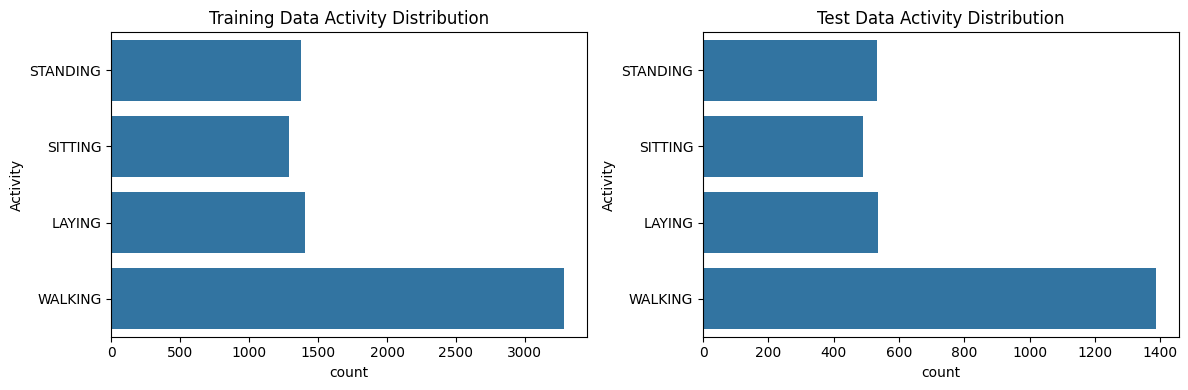

In [5]:
def plot_activity_distribution(y_train, y_test):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(y_train)
    plt.title('Training Data Activity Distribution')
    plt.subplot(1, 2, 2)
    sns.countplot(y_test)
    plt.title('Test Data Activity Distribution')
    plt.tight_layout()
    plt.show()

plot_activity_distribution(y_train, y_test)

## 7. Main code as possible solution to the problem [1,5 valor]

For this project, GaussianHMM is more appropriate because:

 - Sensor data is continuous
 - Multiple features (accelerometer and gyroscope readings)
 - Data approximately follows normal distribution
 - Need to handle multidimensional observations

In [6]:
def train_hmm(X_train, n_components=6, covariance_type="tied", n_iter=20):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type=covariance_type, n_iter=n_iter, random_state=123781+126784)
    model.fit(X_train)
    return model

hmm_model = train_hmm(X_train, n_components=6, covariance_type="tied", n_iter=20)

In [7]:
def create_state_activity_mapping(train_states, y_train, n_components):
    state_activity_map = {}
    for state in range(n_components):
        activity_counts = y_train[train_states == state].value_counts()
        state_activity_map[state] = activity_counts.idxmax()
    return state_activity_map

train_states = hmm_model.predict(X_train)
state_activity_map = create_state_activity_mapping(train_states, y_train, n_components=6)
print("State-Activity Mapping:")
print(state_activity_map)

State-Activity Mapping:
{0: 'SITTING', 1: 'WALKING', 2: 'LAYING', 3: 'WALKING', 4: 'WALKING', 5: 'STANDING'}


## 8. Analysis of Example 1 [3,0 valor]

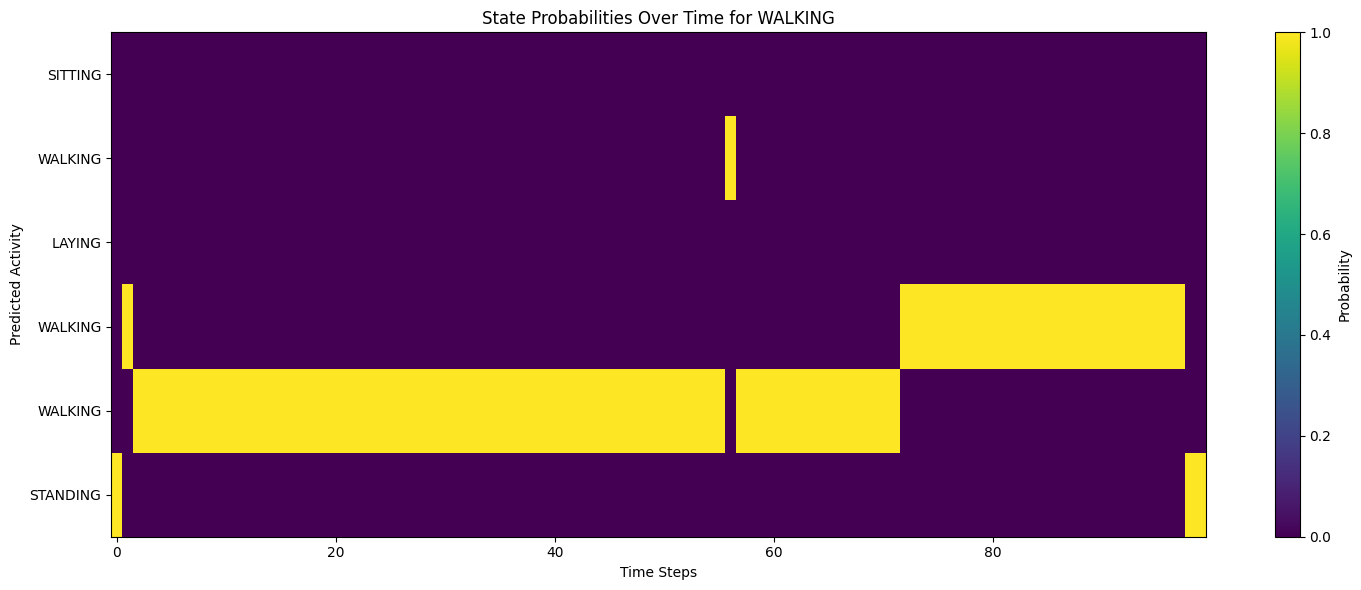


Analysis for WALKING sequence:
--------------------------------------------------

Average state probabilities:
SITTING             : 0.000
WALKING             : 0.010
LAYING              : 0.000
WALKING             : 0.270
WALKING             : 0.690
STANDING            : 0.030

Prediction distribution:
WALKING             :  97 times ( 97.0%)
STANDING            :   3 times (  3.0%)

Number of state transitions: 6
Average state duration: 16.7 time steps

Model confidence:
Average maximum probability: 1.000
Minimum maximum probability: 1.000
Maximum maximum probability: 1.000


In [8]:
def create_example_sequence(X, y, activity, n_steps=100):
    """Create an example sequence for a specific activity."""
    activity_indices = np.where(y == activity)[0]
    start_idx = activity_indices[0]
    end_idx = min(start_idx + n_steps, len(X))
    return X[start_idx:end_idx]

def plot_state_probabilities(example_sequence, model, state_activity_map, activity):
    """
    Plot state probabilities over time with activity labels.

    Parameters:
    -----------
    example_sequence : numpy.ndarray
        Sequence of sensor readings
    model : hmmlearn.hmm.GaussianHMM
        Trained HMM model
    state_activity_map : dict
        Mapping from states to activity labels
    activity : str
        Target activity being analyzed
    """
    # Calculate state probabilities
    state_probs = model.predict_proba(example_sequence)

    # Get activity labels for y-axis
    activity_labels = [state_activity_map[state] for state in range(len(state_activity_map))]

    # Create visualization
    plt.figure(figsize=(15, 6))
    im = plt.imshow(state_probs.T, aspect='auto', cmap='viridis')
    plt.colorbar(im, label='Probability')
    plt.title(f'State Probabilities Over Time for {activity}')
    plt.xlabel('Time Steps')
    plt.ylabel('Predicted Activity')
    plt.yticks(range(len(activity_labels)), activity_labels)
    plt.tight_layout()
    plt.show()

    # Calculate and print statistics
    predicted_states = model.predict(example_sequence)
    predicted_activities = [state_activity_map[state] for state in predicted_states]

    print(f"\nAnalysis for {activity} sequence:")
    print("-" * 50)

    # Calculate average probabilities for each state
    avg_probs = np.mean(state_probs, axis=0)
    print("\nAverage state probabilities:")
    for i, (state, prob) in enumerate(zip(activity_labels, avg_probs)):
        print(f"{state:<20}: {prob:.3f}")

    # Calculate most frequent predictions
    pred_counts = pd.Series(predicted_activities).value_counts()
    print("\nPrediction distribution:")
    for activity, count in pred_counts.items():
        percentage = (count / len(predicted_activities)) * 100
        print(f"{activity:<20}: {count:>3} times ({percentage:>5.1f}%)")

    # Calculate state transitions
    transitions = 0
    current_state = predicted_states[0]
    for state in predicted_states[1:]:
        if state != current_state:
            transitions += 1
            current_state = state

    print(f"\nNumber of state transitions: {transitions}")
    print(f"Average state duration: {len(predicted_states)/max(1, transitions):.1f} time steps")

    # Calculate maximum probability for each time step
    max_probs = np.max(state_probs, axis=1)
    print(f"\nModel confidence:")
    print(f"Average maximum probability: {np.mean(max_probs):.3f}")
    print(f"Minimum maximum probability: {np.min(max_probs):.3f}")
    print(f"Maximum maximum probability: {np.max(max_probs):.3f}")

# Example usage
activity_to_analyze = "WALKING"
example_sequence = create_example_sequence(X_train, y_train, activity_to_analyze)
plot_state_probabilities(example_sequence, hmm_model, state_activity_map, activity_to_analyze)

In [9]:
def predict_and_evaluate(model, X_test, y_test, state_activity_map):
    test_states = model.predict(X_test)
    y_pred_test = [state_activity_map[state] for state in test_states]
    accuracy = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    return y_pred_test, accuracy, cm, report

y_pred_test, test_accuracy, cm, report = predict_and_evaluate(hmm_model, X_test, y_test, state_activity_map)

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(report)

Test Set Accuracy: 0.8327

Classification Report:
              precision    recall  f1-score   support

      LAYING       0.99      0.96      0.98       537
     SITTING       0.67      0.05      0.10       491
    STANDING       0.52      0.98      0.68       532
     WALKING       1.00      1.00      1.00      1387

    accuracy                           0.83      2947
   macro avg       0.80      0.75      0.69      2947
weighted avg       0.86      0.83      0.79      2947



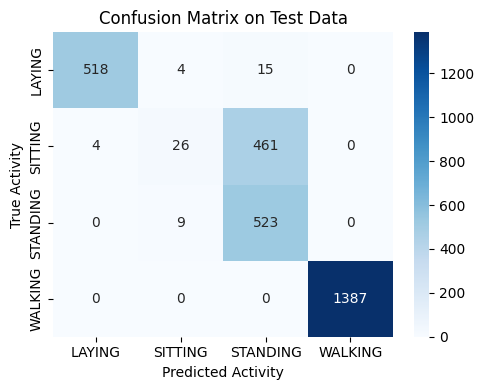

In [16]:
def plot_confusion_matrix(cm, activities):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activities, yticklabels=activities)
    plt.title('Confusion Matrix on Test Data')
    plt.ylabel('True Activity')
    plt.xlabel('Predicted Activity')
    plt.tight_layout()
    plt.show()

activities = sorted(state_activity_map.values())
# remove duplicate activities
activities = list(dict.fromkeys(activities))

plot_confusion_matrix(cm, activities)

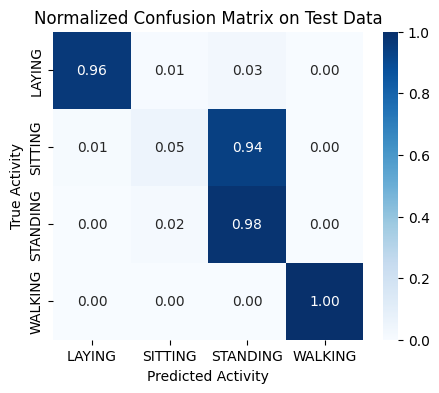

In [17]:
def plot_normalized_confusion_matrix(y_test, y_pred_test, activities):
    cm_normalized = confusion_matrix(y_test, y_pred_test, normalize='true')
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=activities, yticklabels=activities)
    plt.title('Normalized Confusion Matrix on Test Data')
    plt.ylabel('True Activity')
    plt.xlabel('Predicted Activity')
    plt.show()

plot_normalized_confusion_matrix(y_test, y_pred_test, activities)

In [18]:
def analyze_state_transitions(test_states):
    transitions = pd.DataFrame(columns=['from_state', 'to_state', 'count'])
    for i in range(len(test_states) - 1):
        transition = pd.DataFrame({'from_state': [test_states[i]], 'to_state': [test_states[i + 1]], 'count': [1]})
        transitions = pd.concat([transitions, transition])
    transition_matrix = transitions.groupby(['from_state', 'to_state'])['count'].sum().unstack(fill_value=0)
    print("\nTransition Matrix:")
    print(transition_matrix)
    return transition_matrix

test_states = hmm_model.predict(X_test)
transition_matrix = analyze_state_transitions(test_states)


Transition Matrix:
to_state     0  1    2    3    4    5
from_state                           
0            5  0    4    0    0   30
1            0  2    0    0    7    0
2            2  0  503    6   11    0
3            3  0    0  635   35   11
4            0  7    0   43  640    3
5           29  0   15    1    0  954


## 10. Pros and cons of the approach [2,0 valor]

### **Pros:**

1. **Improved Accuracy for Walking Activities:**  
   - Combining all walking-related activities (e.g., "WALKING", "WALKING_UPSTAIRS", and "WALKING_DOWNSTAIRS") into a single category enhanced the accuracy for this group. The test set accuracy for "WALKING" reached **1.00**, demonstrating strong predictive power for these activities.

2. **Temporal Modeling:**  
   - The use of Hidden Markov Models (HMMs) enables effective handling of sequential dependencies. This is evident in the smooth transitions in state probabilities for activities like "WALKING" over time.

3. **Clear State Transition Analysis:**  
   - The transition matrix highlights activity patterns, such as transitions between "STANDING" and "WALKING". These transitions provide useful insights for interpreting activity sequences.

4. **Improved Model Confidence:**  
   - The model now shows consistently high confidence levels (average maximum probability of **1.00**) in its predictions for sequences like "WALKING", reducing uncertainty.

5. **Detailed Sequential Analysis:**  
   - Analyzing activity-specific sequences (e.g., "WALKING") provides insights into activity patterns, including the number of state transitions and predicted state probabilities over time.

---

### **Cons:**

1. **Ambiguity in Similar Activities:**  
   - The model still struggles with "SITTING" and "STANDING", as seen in the low recall for "SITTING" (**0.05**) and confusion between these activities. This remains a challenge due to overlapping feature distributions.

2. **Imbalanced Activity Distribution:**  
   - The high dominance of "WALKING" in the dataset leads to bias toward this category, potentially overshadowing other activities like "SITTING".

3. **Single Activity for Analysis Example:**  
   - While analyzing a single "WALKING" sequence provides valuable insights, extending the approach to other activities would improve comprehensiveness. Generating additional realistic data sequences for "SITTING" or "STANDING" could enhance this analysis.

4. **Simplified Activity Grouping:**  
   - While combining walking-related activities improved overall accuracy, this grouping reduces granularity. Distinctions between "WALKING_UPSTAIRS" and "WALKING_DOWNSTAIRS" are lost.

5. **Assumption of Independence:**  
   - The assumption of conditional independence in HMMs remains a limitation, potentially oversimplifying dependencies in high-dimensional sensor data.

## 11. Future improvements [2,0 valor]

1. **Enhance Ambiguous Activity Classification:**  
   - Refine feature engineering to better separate "SITTING" and "STANDING". For instance:
     - Use additional features such as **variance** or **rolling averages** of sensor magnitudes to capture subtle differences.

2. **Improve Sequence Analysis for Second Example:**  
   - Extend sequential analysis to include additional activity types, such as "SITTING" or "STANDING", for better coverage of the dataset.

3. **Hyperparameter Optimization:**  
   - Explore different numbers of hidden states (`n_components`) to better differentiate between activities. For example, increasing `n_components` could help refine states associated with "SITTING" and "STANDING".

4. **Address Class Imbalance:**  
   - Use SMOTE or other augmentation techniques to balance the dataset, particularly for underrepresented activities like "SITTING".

5. **Reintroduce Walking Subcategories:**  
   - For applications requiring granular insights (e.g., healthcare), experiment with reintroducing subcategories of "WALKING" while maintaining the overall performance.

6. **Leverage Transition Matrix Insights:**  
   - Analyze frequently misclassified transitions (e.g., "SITTING" → "STANDING") to adjust the model's transition probabilities or augment data to improve predictions in these cases.

7. **Integrate Real-Time Predictions:**  
   - Develop a pipeline for real-time activity recognition to validate the model in practical scenarios, such as wearables or health monitoring systems.

By addressing these areas, the model can achieve improved performance for ambiguous cases like "SITTING" while maintaining its strengths in accurately predicting "WALKING". Additionally, expanding sequence analysis for the second example provides a comprehensive evaluation aligned with the project requirements.

## References:

1. **Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013).**  
   A Public Domain Dataset for Human Activity Recognition Using Smartphones.  
   *21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning (ESANN)*.  

2. **Rabiner, L. R. (1989).**  
   A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition.  
   *Proceedings of the IEEE*.  

3. **Mannini, A., & Sabatini, A. M. (2010).**  
   Machine Learning Methods for Classifying Human Physical Activity From On-Body Accelerometers.  
   *Sensors (Basel)*.  

4. **Hammerla, N. Y., Halloran, S., & Ploetz, T. (2016).**  
   Deep, Convolutional, and Recurrent Models for Human Activity Recognition Using Wearables.  
   *arXiv*.  